In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with open('./channels_temporal_lobe.txt') as f:
    lines = f.readlines()
lines = [line[:-1] for line in lines]    
print(lines)

['7Networks_LH_Vis_1', '7Networks_LH_Vis_2', '7Networks_LH_SomMot_1', '7Networks_LH_SomMot_2', '7Networks_LH_SomMot_3', '7Networks_LH_DorsAttn_Post_1', '7Networks_LH_SalVentAttn_ParOper_1', '7Networks_LH_SalVentAttn_FrOperIns_1', '7Networks_LH_Limbic_TempPole_1', '7Networks_LH_Limbic_TempPole_2', '7Networks_LH_Default_Temp_1', '7Networks_LH_Default_Temp_2', '7Networks_LH_Default_Par_1', '7Networks_RH_Vis_1', '7Networks_RH_Vis_2', '7Networks_RH_Vis_3', '7Networks_RH_SomMot_1', '7Networks_RH_SomMot_2', '7Networks_RH_SomMot_3', '7Networks_RH_DorsAttn_Post_1', '7Networks_RH_SalVentAttn_TempOccPar_1', '7Networks_RH_Default_Temp_1', '7Networks_RH_Default_Temp_3']


In [3]:
csv = pd.read_csv('./channel_sensitivity_Schaefer100_7networks.csv')

In [5]:
csv.head()

,Unnamed: 0,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,...,7Networks_RH_Default_Temp_1,7Networks_RH_Default_Temp_2,7Networks_RH_Default_Temp_3,7Networks_RH_Default_PFCv_1,7Networks_RH_Default_PFCv_2,7Networks_RH_Default_PFCdPFCm_1,7Networks_RH_Default_PFCdPFCm_2,7Networks_RH_Default_PFCdPFCm_3,7Networks_RH_Default_pCunPCC_1,7Networks_RH_Default_pCunPCC_2
0,m00d0s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.387082e-07,0.000001,0.0,0.0,0.0
1,m00d1s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.444781e-06,0.000002,0.0,0.0,0.0
2,m00d2s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.275460e-06,0.000006,0.0,0.0,0.0
3,m00d3s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.166158e-06,0.000015,0.0,0.0,0.0
4,m00d4s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.020328e-06,0.000012,0.0,0.0,0.0


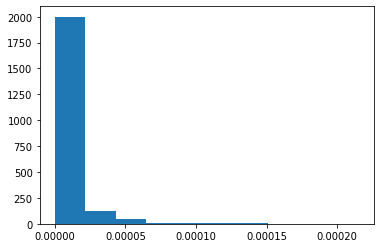

In [15]:
plt.hist(np.max(csv.values[:, 1:], axis = 1))
plt.show()

In [16]:
from sklearn import preprocessing

In [48]:
normalized = preprocessing.normalize(csv.values[:, 1:], axis = 1)

In [49]:
tile_mean = np.tile(np.mean(nomalized, axis = 1), (100, 1)).T

In [51]:
dif = normalized - tile_mean

In [62]:
dif_pos = dif.copy()
dif_pos[dif_pos < 0] = 0

In [68]:
pd.DataFrame(np.hstack((csv.values[:, 0].reshape(2206, 1), dif_pos)), columns=csv.columns)

,Unnamed: 0,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,...,7Networks_RH_Default_Temp_1,7Networks_RH_Default_Temp_2,7Networks_RH_Default_Temp_3,7Networks_RH_Default_PFCv_1,7Networks_RH_Default_PFCv_2,7Networks_RH_Default_PFCdPFCm_1,7Networks_RH_Default_PFCdPFCm_2,7Networks_RH_Default_PFCdPFCm_3,7Networks_RH_Default_pCunPCC_1,7Networks_RH_Default_pCunPCC_2
0,m00d0s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.002152,0.0,0.0,0.0
1,m00d1s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.003813,0.004652,0.0,0.0,0.0
2,m00d2s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.026467,0.039849,0.0,0.0,0.0
3,m00d3s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.014697,0.116144,0.0,0.0,0.0
4,m00d4s00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.086305,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,m51d1s51,0.0,0.077413,0.0,0.977753,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2202,m51d2s51,0.0,0.038719,0.0,0.987226,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2203,m51d3s51,0.0,0.007422,0.0,0.989155,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2204,m51d4s51,0.0,0.000205,0.0,0.987684,0.0,0.0,0.013372,0.025349,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
print(np.shape(dif_pos))
csv.values[:, 0].shape

(2206, 100)


(2206,)

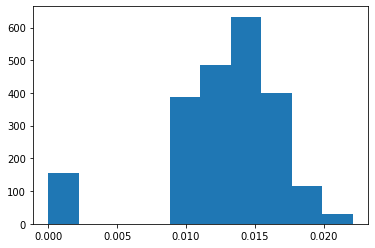

In [61]:
plt.hist(np.mean(dif_pos, axis = 1));

In [ ]:
csv[csv['7Networks_LH_Vis_2'] >0]['Unnamed: 0'].values

In [ ]:
good_indexes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 16, 17, 18, 19, 20, 21, 22, 23 ,24, 25, 26, 27, 28, 29, 30, 32, 33, 38, 39, 51, 52, 53, 54, 55, 56, 57, 58, 67, 68, 6, 70, 71, 91, 92, 93]

In [ ]:
good_channels = csv.columns[good_indexes].values

In [ ]:
ls_ls = [csv[csv[ch] > 0]['Unnamed: 0'].values for ch in good_channels]

In [ ]:
ls = (np.unique([item for sublist in ls_ls for item in sublist]))

In [ ]:
from give_channels import give_channels

In [ ]:
give_channels()

In [ ]:
[(i, x) for i, x in enumerate (csv.columns)]

In [ ]:
csv.shape

In [ ]:
# plt.imshow(csv.values[:, 1:]);
plt.figure(figsize=(50, 30))
plt.imshow((csv.values[:, 1:]).astype(float).T, cmap='binary')

In [ ]:
2206*2